In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Inspect Sub-datasets of the Million Songs Dataset

In [2]:
df_songs0 = pd.read_csv('data/Songs/songs0.csv', index_col=0)
df_songs0.shape

(67503, 8)

In [3]:
df_songs0.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
pid,,,,,,,,
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [4]:
df_songs0.dtypes

pos             int64
artist_name    object
track_uri      object
artist_uri     object
track_name     object
album_uri      object
duration_ms     int64
album_name     object
dtype: object

In [5]:
df_songs0.describe()

,pos,duration_ms
count,67503.000000,6.750300e+04
mean,55.638223,2.331839e+05
std,49.051327,6.455234e+04
min,0.000000,0.000000e+00
25%,17.000000,1.984130e+05
50%,41.000000,2.248660e+05
75%,82.000000,2.580400e+05
max,244.000000,2.424189e+06


In [6]:
def plot_popular_artists(df, ax):
    artist_list = df.artist_name
    Artists = {artist:0 for artist in artist_list.unique()}

    for a in artist_list:
        Artists[a] += 1

    popular_artists = sorted(list(Artists.items()), key=lambda x: x[1], reverse=True)[:20]
    labels, counts = zip(*popular_artists)

    ax.barh(list(range(len(counts))), counts, tick_label=labels)

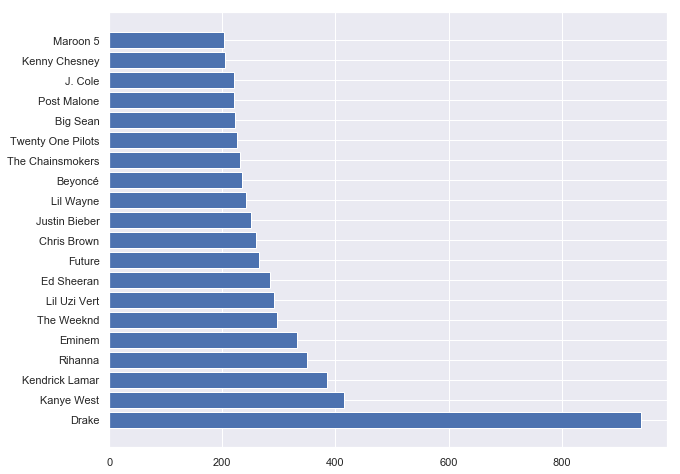

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_popular_artists(df_songs0, ax)

# Look at Commonly Seen Artists for Several Sub-datasets

In [10]:
samples = np.arange(99, 999, 100)
dframes = [pd.read_csv(f"data/Songs/songs{i}.csv", index_col=0) for i in samples]

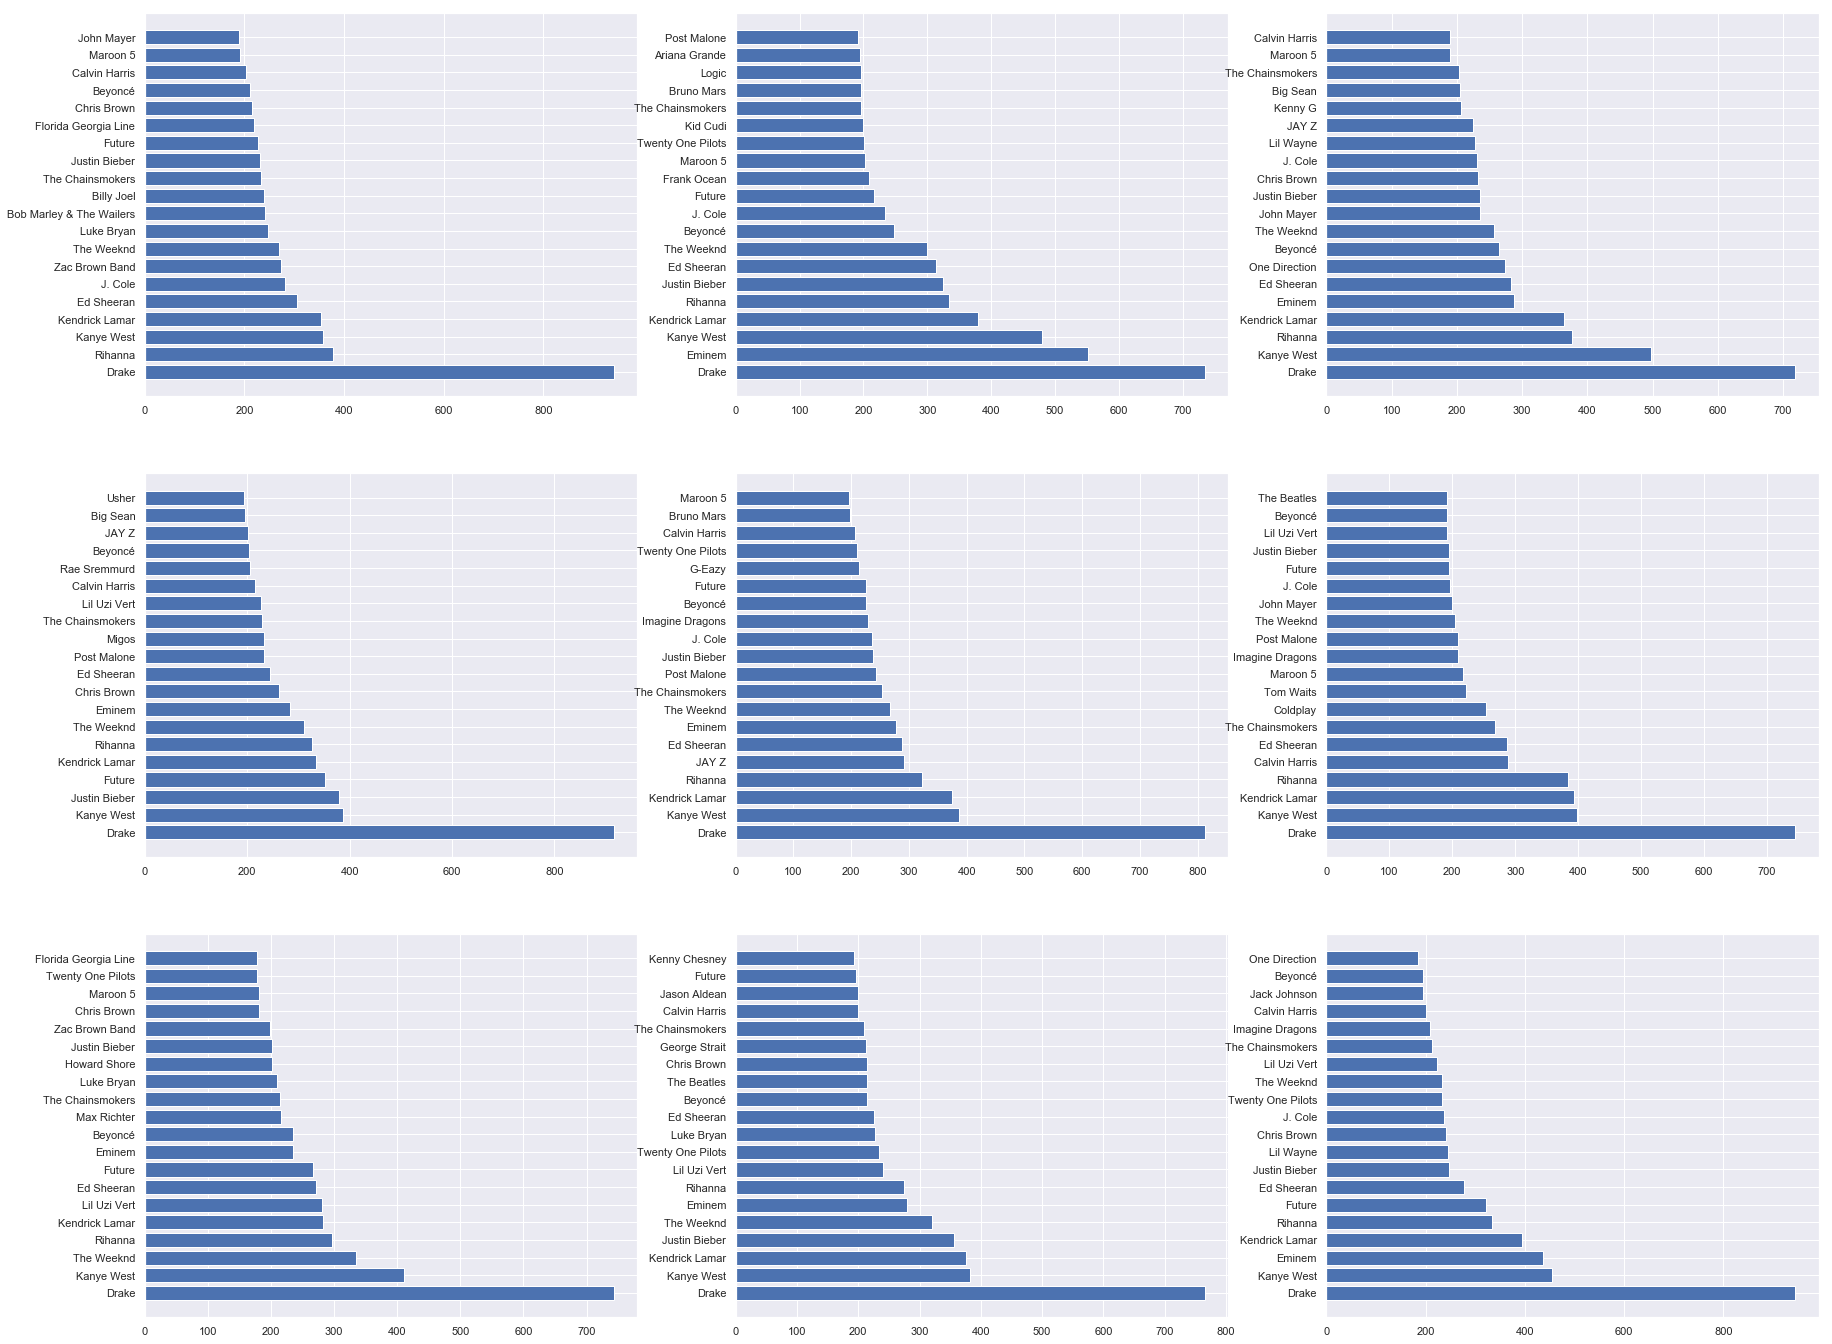

In [11]:
df_songs0.shape
fig, axs = plt.subplots(3, 3, figsize=(30, 24))
for ax, df in zip(axs.reshape(-1), dframes):  
    plot_popular_artists(df, ax)